In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import scipy.stats as stat

In [2]:
#task1-Import a 311 NYC service request.
nyc = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
nyc.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
#task2-Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [6]:
nyc['Closed_Date']=pd.to_datetime(nyc['Closed Date'])
nyc['Created_Date']=pd.to_datetime(nyc['Created Date'])
nyc['Request_Closing_Time']=nyc.Closed_Date - nyc.Created_Date
nyc.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
nyc[['Created_Date','Closed_Date','Request_Closing_Time']].head()

,Created_Date,Closed_Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,0 days 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,0 days 01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,0 days 04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,0 days 07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,0 days 03:27:02


In [10]:
#task3-Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [11]:
## to do this,some specific columns are selected which by observation may impact the complaint types, will be shown graphically and insights will be drawn if any specific inference found

In [12]:
#1 total values under feature 'Complaint Type'
nyc['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [24]:
#1 measuring the frequency of differnt complaint types as % where %>1
nyc_complaint=nyc['Complaint Type'].value_counts()
nyc_complaint=nyc_complaint.to_frame()
nyc_complaint=nyc_complaint.rename(columns={'Complaint Type':'Counts'})
nyc_complaint['Percent']=np.around((nyc_complaint.Counts/nyc_complaint.Counts.sum())*100,decimals=2)
nyc_complaint=nyc_complaint[nyc_complaint.Percent>1.00]
nyc_complaint=nyc_complaint.reset_index()
nyc_complaint=nyc_complaint.rename(columns={'index':'Complaint_Type'})
nyc_complaint

,Complaint_Type,Counts,Percent
0,Blocked Driveway,77044,25.62
1,Illegal Parking,75361,25.06
2,Noise - Street/Sidewalk,48612,16.17
3,Noise - Commercial,35577,11.83
4,Derelict Vehicle,17718,5.89
5,Noise - Vehicle,17083,5.68
6,Animal Abuse,7778,2.59
7,Traffic,4498,1.50
8,Homeless Encampment,4416,1.47
9,Noise - Park,4042,1.34


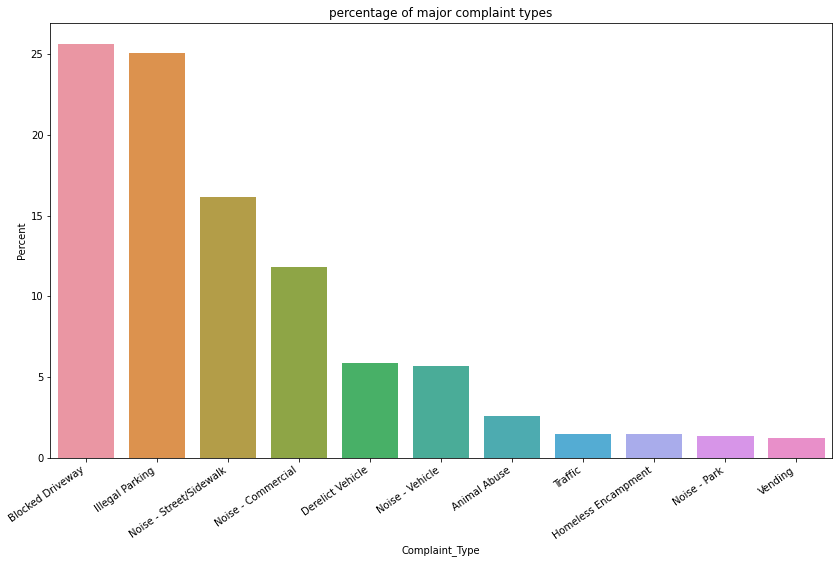

<Figure size 432x288 with 0 Axes>

In [38]:
#1 graphical visualization of the above result
plt.figure(figsize= (14,8))
complaint_type=sns.barplot(x=nyc_complaint.Complaint_Type ,y=nyc_complaint.Percent,data=nyc_complaint)
complaint_type.set_xticklabels(complaint_type.get_xticklabels(),rotation=35,ha='right')
plt.title('percentage of major complaint types')
plt.show()
plt.tight_layout ()

In [46]:
print('insights are:')
print('the major complaint types are, 1. Blocked Driveaway 2. Illegal parking 3. Noise-Street/Sidewalk 4.Noise-Commercial')
print('the six major complaint types are related to roads/vehicles')

insights are:
the major complaint types are, 1. Blocked Driveaway 2. Illegal parking 3. Noise-Street/Sidewalk 4.Noise-Commercial
the six major complaint types are related to roads/vehicles


In [6]:
#2 total values under feature 'Descriptor'
nyc['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [41]:
#2 measuring the frequency of differnt descriptor as % where %>1
nyc_descriptor=nyc['Descriptor'].value_counts()
nyc_descriptor=nyc_descriptor.to_frame()
nyc_descriptor=nyc_descriptor.rename(columns={'Descriptor':'Counts'})
nyc_descriptor['Percent']=np.around((nyc_descriptor.Counts/nyc_descriptor.Counts.sum())*100,decimals=2)
nyc_descriptor=nyc_descriptor[nyc_descriptor.Percent>1.00]
nyc_descriptor=nyc_descriptor.reset_index()
nyc_descriptor=nyc_descriptor.rename(columns={'index':'Descriptor'})
nyc_descriptor

,Descriptor,Counts,Percent
0,Loud Music/Party,61430,20.84
1,No Access,56976,19.33
2,Posted Parking Sign Violation,22440,7.61
3,Loud Talking,21584,7.32
4,Partial Access,20068,6.81
5,With License Plate,17718,6.01
6,Blocked Hydrant,16081,5.46
7,Commercial Overnight Parking,12189,4.13
8,Car/Truck Music,11273,3.82
9,Blocked Sidewalk,11121,3.77


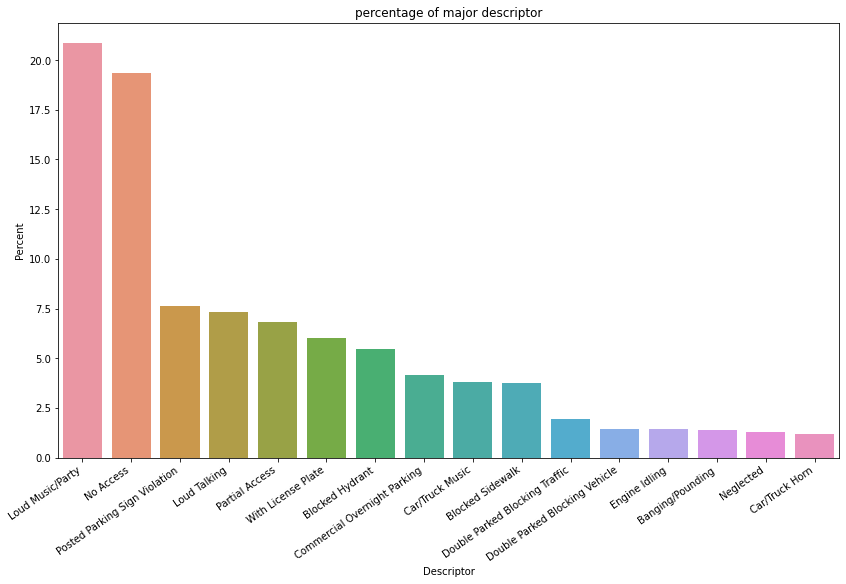

<Figure size 432x288 with 0 Axes>

In [47]:
#2 graphical visualization of the above result
plt.figure(figsize= (14,8))
desc_type=sns.barplot(x=nyc_descriptor.Descriptor ,y=nyc_descriptor.Percent,data=nyc_descriptor)
desc_type.set_xticklabels(desc_type.get_xticklabels(),rotation=35,ha='right')
plt.title('percentage of major descriptor')
plt.show()
plt.tight_layout ()

In [45]:
print('insights are:')
print('the major descriptors are, 1. Loud Music/Party 2. No Access')

insights are:
the two major descriptors are, 1. Loud Music/Party 2. No Access


In [7]:
#3 total values under feature 'Location Type'
nyc['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', nan,
       'Ferry', 'Park'], dtype=object)

In [49]:
#3 measuring the frequency of differnt location type as % where %>1
nyc_loc=nyc['Location Type'].value_counts()
nyc_loc=nyc_loc.to_frame()
nyc_loc=nyc_loc.rename(columns={'Location Type':'Counts'})
nyc_loc['Percent']=np.around((nyc_loc.Counts/nyc_loc.Counts.sum())*100,decimals=2)
nyc_loc=nyc_loc[nyc_loc.Percent>1.00]
nyc_loc=nyc_loc.reset_index()
nyc_loc=nyc_loc.rename(columns={'index':'Location_Type'})
nyc_loc

,Location_Type,Counts,Percent
0,Street/Sidewalk,249299,82.94
1,Store/Commercial,20381,6.78
2,Club/Bar/Restaurant,17360,5.78
3,Residential Building/House,6960,2.32
4,Park/Playground,4773,1.59


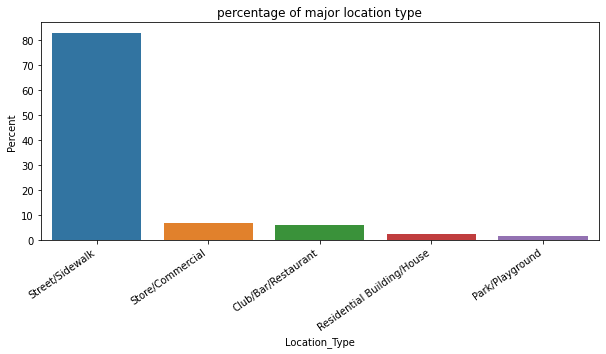

<Figure size 432x288 with 0 Axes>

In [51]:
#3 graphical visualization of the above result
plt.figure(figsize= (10,4))
loc_type=sns.barplot(x=nyc_loc.Location_Type ,y=nyc_loc.Percent,data=nyc_loc)
loc_type.set_xticklabels(loc_type.get_xticklabels(),rotation=35,ha='right')
plt.title('percentage of major location type')
plt.show()
plt.tight_layout ()

In [52]:
print('insights are:')
print('the major location type is Street/Sidewalk which contributes 82.94 % of the complaints')
print('this observation is associated with the observation in major complaint types bar chart,where major complaints are related to roads/vehicles')

insights are:
the major location type is Street/Sidewalk which contributes 82.94 % of the complaints
this observation is associated with the observation in major complaint types bar chart,where major complaints are related to roads/vehicles


In [8]:
#4 total values under feature 'City'
nyc.City.unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [11]:
#4 measuring the frequency of differnt cities as % where %>1
nyc_city=nyc['City'].value_counts()
nyc_city=nyc_city.to_frame()
nyc_city=nyc_city.rename(columns={'City':'Counts'})
nyc_city['Percent']=np.around((nyc_city.Counts/nyc_city.Counts.sum())*100,decimals=2)
nyc_city=nyc_city[nyc_city.Percent>1.00]
nyc_city=nyc_city.reset_index()
nyc_city=nyc_city.rename(columns={'index':'City'})
nyc_city

,City,Counts,Percent
0,BROOKLYN,98307,32.98
1,NEW YORK,65994,22.14
2,BRONX,40702,13.65
3,STATEN ISLAND,12343,4.14
4,JAMAICA,7296,2.45
5,ASTORIA,6330,2.12
6,FLUSHING,5971,2.00
7,RIDGEWOOD,5163,1.73
8,CORONA,4295,1.44
9,WOODSIDE,3544,1.19


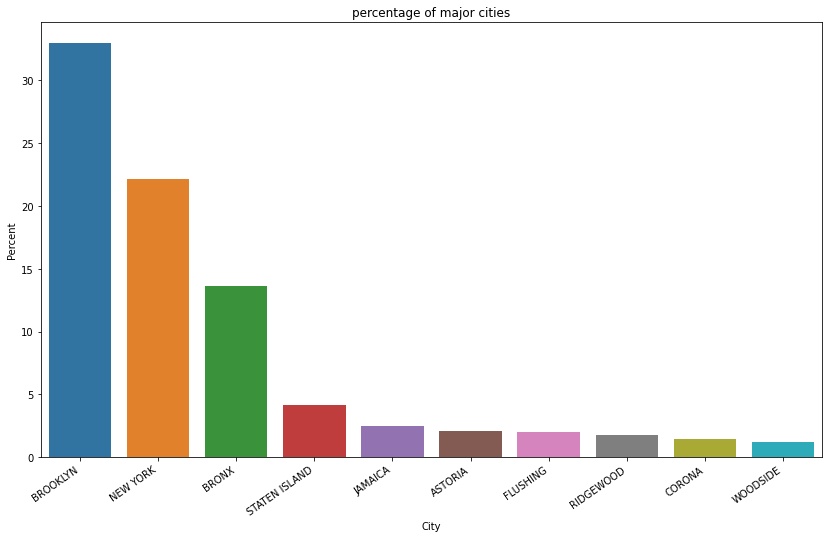

<Figure size 432x288 with 0 Axes>

In [17]:
#4 graphical visualization of the above result
plt.figure(figsize= (14,8))
city_type=sns.barplot(x=nyc_city.City ,y=nyc_city.Percent,data=nyc_city)
city_type.set_xticklabels(city_type.get_xticklabels(),rotation=35,ha='right')
plt.title('percentage of major cities')
plt.show()
plt.tight_layout ()

In [18]:
print('insights are:')
print('there are 3 cities which contributing about 69% of the complaints')
print('these cities are, 1. Brooklyn 2. New York 3. Bronx')

insights are:
there are 3 cities which contributing about 69% of the complaints
these cities are, 1. Brooklyn 2. New York 3. Bronx


In [19]:
#5 total values under feature 'Status'
nyc.Status.unique()

array(['Closed', 'Open', 'Assigned', 'Draft'], dtype=object)

In [21]:
#5 measuring the frequency of differnt status as % where %>1
nyc_stat=nyc['Status'].value_counts()
nyc_stat=nyc_stat.to_frame()
nyc_stat=nyc_stat.rename(columns={'Status':'Counts'})
nyc_stat['Percent']=np.around((nyc_stat.Counts/nyc_stat.Counts.sum())*100,decimals=2)
nyc_stat=nyc_stat[nyc_stat.Percent>1.00]
nyc_stat=nyc_stat.reset_index()
nyc_stat=nyc_stat.rename(columns={'index':'Status'})
nyc_stat

,Status,Counts,Percent
0,Closed,298471,99.26


In [3]:
print('insights are:')
print('99% of the complaint types are closed, it signifies a good and speedy customer service request resolution')

insights are:
99% of the complaint types are closed, it signifies a good and speedy customer service request resolution


In [4]:
#6 total values under feature 'Resolution Description'
nyc['Resolution Description'].unique()

array(['The Police Department responded and upon arrival those responsible for the condition were gone.',
       'The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.',
       'The Police Department responded to the complaint and took action to fix the condition.',
       'The Police Department issued a summons in response to the complaint.',
       'The Police Department responded to the complaint and determined that police action was not necessary.',
       'The Police Department reviewed your complaint and provided additional information below.',
       'Your request can not be processed at this time because of insufficient contact information. Please create a new Service Request on NYC.gov and provide more detailed contact information.',
       "This complaint does not fall under the Police Department's jurisdiction.",
       'Your complaint has been forwarded to the New York Police Department for a 

In [5]:
#6 measuring the frequency of differnt resolution description as % where %>1
nyc_rd=nyc['Resolution Description'].value_counts()
nyc_rd=nyc_rd.to_frame()
nyc_rd=nyc_rd.rename(columns={'Resolution Description':'Counts'})
nyc_rd['Percent']=np.around((nyc_rd.Counts/nyc_rd.Counts.sum())*100,decimals=2)
nyc_rd=nyc_rd[nyc_rd.Percent>1.00]
nyc_rd=nyc_rd.reset_index()
nyc_rd=nyc_rd.rename(columns={'index':'Resolution_Description'})
nyc_rd

,Resolution_Description,Counts,Percent
0,The Police Department responded to the complai...,90490,30.09
1,The Police Department responded to the complai...,61624,20.49
2,The Police Department responded and upon arriv...,58031,19.30
3,The Police Department responded to the complai...,38211,12.71
4,The Police Department issued a summons in resp...,28246,9.39
5,The Police Department reviewed your complaint ...,13821,4.60
6,Your request can not be processed at this time...,4310,1.43


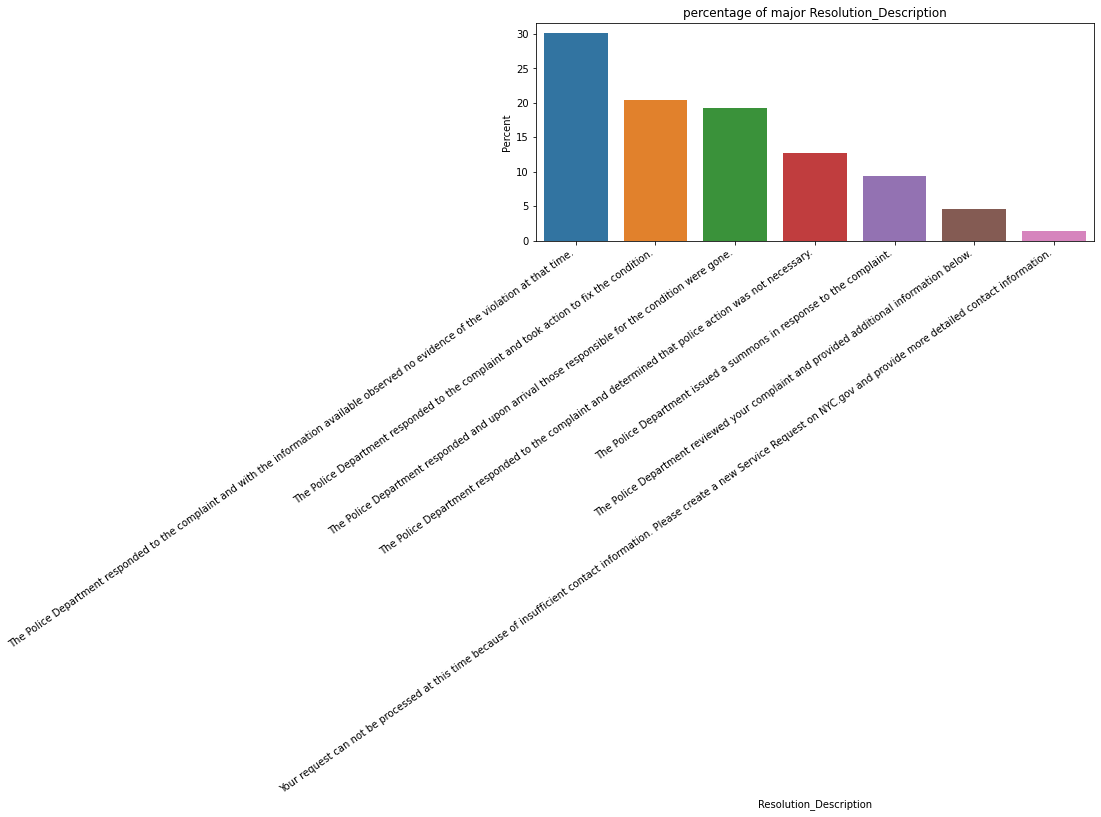

<Figure size 432x288 with 0 Axes>

In [8]:
#6 graphical visualization of the above result
plt.figure(figsize= (10,4))
rd_type=sns.barplot(x=nyc_rd.Resolution_Description,y=nyc_rd.Percent,data=nyc_rd)
rd_type.set_xticklabels(rd_type.get_xticklabels(),rotation=35,ha='right')
plt.title('percentage of major Resolution_Description')
plt.show()
plt.tight_layout ()

In [9]:
print('insights are:')
print('four major bars above imdicates that the police department responded to the issue and found approx 50% of the issue either there was no violation or police action was neccessary')
print('it signifies that if properly scrutinised at the time of complaint registration,a siginificant proportion of police workload could be reduced')

insights are:
four major bars above imdicates that the police department responded to the issue and found approx 50% of the issue either there was no violation or police action was neccessary
it signifies that if properly scrutinised at the time of complaint registration,a siginificant proportion of police workload could be reduced


In [9]:
#task4- Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
## for calculation, a new feature DeltaT(in_hr) is created which holds Request_closing_Time in integer format
nyc_place_com_cls=nyc[['City','Complaint Type','Request_Closing_Time']]
nyc_place_com_cls.dropna(subset=['City','Complaint Type','Request_Closing_Time'],inplace=True)
nyc_place_com_cls['DeltaT(in_hr)']=np.around((nyc_place_com_cls.Request_Closing_Time.astype(np.int64)/(pow(10,9)*3600)),decimals=2)
nyc_place_com_cls.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,City,Complaint Type,Request_Closing_Time,DeltaT(in_hr)
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15,0.92
1,ASTORIA,Blocked Driveway,0 days 01:26:16,1.44
2,BRONX,Blocked Driveway,0 days 04:51:31,4.86
3,BRONX,Illegal Parking,0 days 07:45:14,7.75
4,ELMHURST,Illegal Parking,0 days 03:27:02,3.45


In [42]:
## avg 'turn around time' in complaint closure
avg_time=np.around((nyc_place_com_cls['DeltaT(in_hr)'].mean()),decimals=2)
print('avg TAT in complaint closure is',avg_time,'hour')

avg TAT in complaint closure is 4.31 hour


In [66]:
com_cls_avgtime_grouped=nyc_place_com_cls.groupby(['City','Complaint Type']).agg({'DeltaT(in_hr)':'mean'})
com_cls_avgtime_grouped=com_cls_avgtime_grouped.rename(columns={'DeltaT(in_hr)':'avg_time(given_city,complaint_type)'})
com_cls_avgtime_grouped=com_cls_avgtime_grouped.transform('avg_time(given_city,complaint_type)')
com_cls_avgtime_grouped=com_cls_avgtime_grouped.to_frame()
com_cls_avgtime_grouped=com_cls_avgtime_grouped.sort_values(['City','avg_time(given_city,complaint_type)'])
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
com_cls_avgtime_grouped.head(15)

avg_time(given_city,complaint_type)
City    Complaint Type                                               
ARVERNE Drinking                                             0.240000
        Vending                                              0.480000
        Urinating in Public                                  0.690000
        Panhandling                                          1.030000
        Noise - Park                                         1.285000
        Graffiti                                             1.530000
        Noise - House of Worship                             1.562727
        Homeless Encampment                                  1.812500
        Noise - Vehicle                                      1.860000
        Noise - Street/Sidewalk                              1.992759
        Animal Abuse                                         2.153158
        Noise - Commercial                                   2.285000
        Illegal Parking                                      2.316207
        Blocked Driveway                                     2.526286
        Derelict Vehicle                                     2.968519

In [68]:
print('the avove table represents the complaint types based on the average Request_Closing_Time, grouping them for different cities')

the avove table represents the complaint types based on the average Request_Closing_Time, grouping them for different cities


In [3]:
#task5- Perform a statistical test for the following:
#Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.
#Whether the average response time across complaint types is similar or not (overall)

In [55]:
print('Null Hypothesis: Avg. response time across complaint types is similar')
print('Alternate Hypothesis: Avg. response time across complaint types are different')
print('From the output of code line 24,  it is evident that 8 categories of complaint types are responsible for 90% of the distribution.')
print('these are ,Illegal parking,Noise-street/sidewalk,Noise-Commercial,Derelict vehicle,Noise-vehicle')
print('Rest of the data is clubbed together in one set termed as Rest')
print('For this kind of null hypothesis, will use the onw way ANNOVA test,since multiple sample means are to be compared')

Null Hypothesis: Avg. response time across complaint types is similar
Alternate Hypothesis: Avg. response time across complaint types are different
From the output of code line 24,  it is evident that 8 categories of complaint types are responsible for 90% of the distribution.
these are ,Illegal parking,Noise-street/sidewalk,Noise-Commercial,Derelict vehicle,Noise-vehicle
Rest of the data is clubbed together in one set termed as Rest
For this kind of null hypothesis, will use the onw way ANNOVA test,since multiple sample means are to be compared


In [12]:
# Create a dataframe by one hot encoding of categorical variable complaint type
nyc2=pd.get_dummies(nyc_place_com_cls['Complaint Type'])
nyc2_plc_com_cls=pd.concat([nyc_place_com_cls,nyc2],axis=1)
nyc2_plc_com_cls.columns

Index(['City', 'Complaint Type', 'Request_Closing_Time', 'DeltaT(in_hr)',
       'Animal Abuse', 'Animal in a Park', 'Bike/Roller/Skate Chronic',
       'Blocked Driveway', 'Derelict Vehicle', 'Disorderly Youth', 'Drinking',
       'Graffiti', 'Homeless Encampment', 'Illegal Fireworks',
       'Illegal Parking', 'Noise - Commercial', 'Noise - House of Worship',
       'Noise - Park', 'Noise - Street/Sidewalk', 'Noise - Vehicle',
       'Panhandling', 'Posting Advertisement', 'Squeegee', 'Traffic',
       'Urinating in Public', 'Vending'],
      dtype='object')

In [17]:
# Create sample set of only non zero rows of 'Blocked Driveway'
sample_BlkDrv=nyc2_plc_com_cls.drop(['Animal Abuse', 'Animal in a Park', 'Bike/Roller/Skate Chronic', 'Derelict Vehicle', 'Disorderly Youth', 'Drinking',
                                     'Graffiti', 'Homeless Encampment', 'Illegal Fireworks','Illegal Parking', 'Noise - Commercial', 'Noise - House of Worship',
                                     'Noise - Park', 'Noise - Street/Sidewalk', 'Noise - Vehicle','Panhandling', 'Posting Advertisement', 'Squeegee', 'Traffic','Urinating in Public', 'Vending'],axis=1)
sample_BlkDrv1=sample_BlkDrv[(sample_BlkDrv[['Blocked Driveway']]!=0).all(axis=1)]
sample_BlkDrv1.shape

(76752, 5)

In [23]:
# Create sample set of only non zero rows of 'Illegal Parking'
sample_IllglPrk=nyc2_plc_com_cls.drop(['Animal Abuse', 'Animal in a Park', 'Bike/Roller/Skate Chronic', 'Derelict Vehicle', 'Disorderly Youth', 'Drinking',
                                     'Graffiti', 'Homeless Encampment', 'Illegal Fireworks','Blocked Driveway', 'Noise - Commercial', 'Noise - House of Worship',
                                     'Noise - Park', 'Noise - Street/Sidewalk', 'Noise - Vehicle','Panhandling', 'Posting Advertisement', 'Squeegee', 'Traffic','Urinating in Public', 'Vending'],axis=1)
sample_IllglPrk1=sample_IllglPrk[(sample_IllglPrk[['Illegal Parking']]!=0).all(axis=1)]
sample_IllglPrk1.shape

(74311, 5)

In [28]:
# Create sample set of only non zero rows of 'Noise - Street/Sidewalk'
sample_NseSdewlk=nyc2_plc_com_cls.drop(['Animal Abuse', 'Animal in a Park', 'Bike/Roller/Skate Chronic', 'Derelict Vehicle', 'Disorderly Youth', 'Drinking',
                                     'Graffiti', 'Homeless Encampment', 'Illegal Fireworks','Illegal Parking', 'Noise - Commercial', 'Noise - House of Worship',
                                     'Noise - Park', 'Blocked Driveway', 'Noise - Vehicle','Panhandling', 'Posting Advertisement', 'Squeegee', 'Traffic','Urinating in Public', 'Vending'],axis=1)
sample_NseSdewlk1=sample_NseSdewlk[(sample_NseSdewlk[['Noise - Street/Sidewalk']]!=0).all(axis=1)]
sample_NseSdewlk1.shape

(47986, 5)

In [32]:
# Create sample set of only non zero rows of 'Noise - Commercial'
sample_NseCom=nyc2_plc_com_cls.drop(['Animal Abuse', 'Animal in a Park', 'Bike/Roller/Skate Chronic', 'Derelict Vehicle', 'Disorderly Youth', 'Drinking',
                                     'Graffiti', 'Homeless Encampment', 'Illegal Fireworks','Illegal Parking', 'Blocked Driveway', 'Noise - House of Worship',
                                     'Noise - Park', 'Noise - Street/Sidewalk', 'Noise - Vehicle','Panhandling', 'Posting Advertisement', 'Squeegee', 'Traffic','Urinating in Public', 'Vending'],axis=1)
sample_NseCom1=sample_NseCom[(sample_NseCom[['Noise - Commercial']]!=0).all(axis=1)]
sample_NseCom1.shape

(35185, 5)

In [36]:
# Create sample set of only non zero rows of 'Derelict Vehicle'
sample_DrlctVhcl=nyc2_plc_com_cls.drop(['Animal Abuse', 'Animal in a Park', 'Bike/Roller/Skate Chronic', 'Blocked Driveway', 'Disorderly Youth', 'Drinking',
                                     'Graffiti', 'Homeless Encampment', 'Illegal Fireworks','Illegal Parking', 'Noise - Commercial', 'Noise - House of Worship',
                                     'Noise - Park', 'Noise - Street/Sidewalk', 'Noise - Vehicle','Panhandling', 'Posting Advertisement', 'Squeegee', 'Traffic','Urinating in Public', 'Vending'],axis=1)
sample_DrlctVhcl1=sample_DrlctVhcl[(sample_DrlctVhcl[['Derelict Vehicle']]!=0).all(axis=1)]
sample_DrlctVhcl1.shape

(17542, 5)

In [40]:
# Create sample set of only non zero rows of 'Noise - Vehicle'
sample_NseVhcl=nyc2_plc_com_cls.drop(['Animal Abuse', 'Animal in a Park', 'Bike/Roller/Skate Chronic', 'Derelict Vehicle', 'Disorderly Youth', 'Drinking',
                                     'Graffiti', 'Homeless Encampment', 'Illegal Fireworks','Illegal Parking', 'Noise - Commercial', 'Noise - House of Worship',
                                     'Noise - Park', 'Noise - Street/Sidewalk', 'Blocked Driveway','Panhandling', 'Posting Advertisement', 'Squeegee', 'Traffic','Urinating in Public', 'Vending'],axis=1)
sample_NseVhcl1=sample_NseVhcl[(sample_NseVhcl[['Noise - Vehicle']]!=0).all(axis=1)]
sample_NseVhcl1.shape

(17027, 5)

In [50]:
# Create sample set of remaining classes of the category complaint type in the set Rest
sample_Rest=nyc2_plc_com_cls.drop(['Noise - Vehicle','Derelict Vehicle','Noise - Commercial','Noise - Street/Sidewalk','Illegal Parking','Blocked Driveway'],axis=1)
sample_Rest['Rest TOT']=sample_Rest.iloc[ : ,-16:].sum(axis=1)
sample_Rest1=sample_Rest.drop(['Animal Abuse', 'Animal in a Park', 'Bike/Roller/Skate Chronic', 'Disorderly Youth', 'Drinking',
                                     'Graffiti', 'Homeless Encampment', 'Illegal Fireworks', 'Noise - House of Worship',
                                     'Noise - Park','Panhandling', 'Posting Advertisement', 'Squeegee', 'Traffic','Urinating in Public', 'Vending'],axis=1)
sample_Rest2=sample_Rest1[(sample_Rest1[['Rest TOT']]!=0).all(axis=1)]
sample_Rest2.shape

(29225, 5)

In [51]:
# One Way ANNOVA
f_val,p_val=stat.f_oneway(sample_BlkDrv1['DeltaT(in_hr)'],sample_IllglPrk1['DeltaT(in_hr)'],sample_NseSdewlk1['DeltaT(in_hr)'],sample_NseCom1['DeltaT(in_hr)'],
                          sample_DrlctVhcl1['DeltaT(in_hr)'],sample_NseVhcl1['DeltaT(in_hr)'],sample_Rest2['DeltaT(in_hr)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=5))

F-statistic is = 1261.1348008835016
p value is = 0.0


In [52]:
if (p_val<0.05):
    print('Null hypothesis is rejected at 5% level of significance since p value({}) is less than 0.05'.format(np.around(p_val,decimals=2)))
else:
    print('Null hypothesis is accepted at 5% level of significance since p value({}) is greater than 0.05'.format(np.around(p_val,decimals=2)))

Null hypothesis is rejected at 5% level of significance since p value(0.0) is less than 0.05


In [53]:
print('hence, we can conclude that average response time across multiple complaint types differ significantly!')

hence, we can conclude that average response time across multiple complaint types differ significantly!


In [54]:
#task6- Perform a statistical test for the following:
#Are the type of complaint or service requested and location related?

In [56]:
print('Null Hypothesis: there is no association b/w complaint types and location/cities values.')
print('Alternative Hypothesis: complaint types & location/cities related to each other.')
print('For this purpose, will use the Crosstab analysis and Chi-square test.')

Null Hypothesis: there is no association b/w complaint types and location/cities values.
Alternative Hypothesis: complaint types & location/cities related to each other.
For this purpose, will use the Crosstab analysis and Chi-square test.


In [57]:
nyc.shape

(300698, 56)

In [58]:
# Checking null values in the two features of interest
print('Null data in Complaint Type =',nyc['Complaint Type'].isnull().sum())
print('Null data in City =',nyc['City'].isnull().sum())

Null data in Complaint Type = 0
Null data in City = 2614


In [62]:
nyc3=nyc[['Complaint Type','City']]
nyc3=nyc3.dropna()
nyc3.shape

(298084, 2)

In [65]:
CityAndComplaint=pd.crosstab(nyc3['Complaint Type'],nyc3['City'],margins=True,margins_name= 'Total')
CityAndComplaint.head()

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside,Total
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,...,55,26,24,557,35,28,45,69,0,7767
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,...,1,1,0,7,2,4,2,4,0,422
Blocked Driveway,35,2618,116,377,95,3,12755,28148,147,0,...,942,1548,262,2142,206,208,1060,1613,11,76761
Derelict Vehicle,27,351,12,198,89,3,1953,5181,115,0,...,358,289,210,1766,10,227,308,247,2,17547


In [69]:
chai2,p_val,df,exp_freq=stat.chi2_contingency(CityAndComplaint)
print('chi square value is',chai2)
print('p_value is',p_val)

chi square value is 119769.34666374495
p_value is 0.0


In [70]:
if (p_val<0.05):
    print('Null hypothesis is rejected at 5% level of significance since p value({}) is less than 0.05'.format(np.around(p_val,decimals=2)))
else:
    print('Null hypothesis is accepted at 5% level of significance since p value({}) is greater than 0.05'.format(np.around(p_val,decimals=2)))

Null hypothesis is rejected at 5% level of significance since p value(0.0) is less than 0.05


In [71]:
print('hence, we can conclude that complaint types & location/cities are significantly related to each other')

hence, we can conclude that complaint types & location/cities are significantly related to each other
